In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("auto0-20231226-141335-673928667-de_mirage-_cz__siddhesh_game_server-430591.csv")
df.head(10)

,currentTick,playerId,X,Y,Z,deltaX,deltaY,deltaZ,yaw,pitch,...,distToTarget,targetHitArea,penetratedObject,weaponUsed,weaponCategory,isScoping,isTargetBlind,isTargetInSmoke,targetReturnedDmg,Label
0,0.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,3.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,4.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,5.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,7.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,8.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,9.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,11.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,12.0,7.656120e+16,-1111.3384,-2445.9138,-95.96875,0.0,0.0,0.0,34.85962,2.48291,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


C:\Users\Dell\AppData\Local\Temp\ipykernel_14416\1116663024.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')


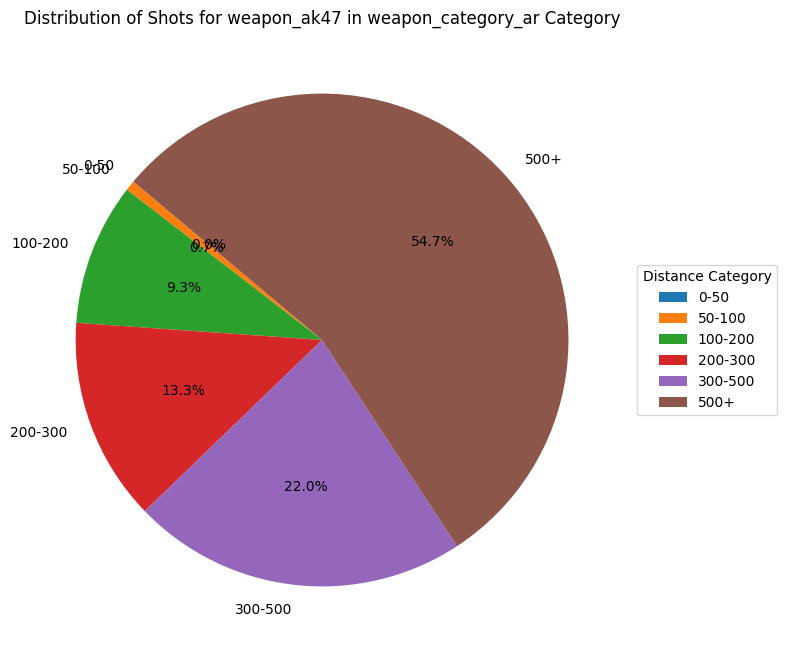

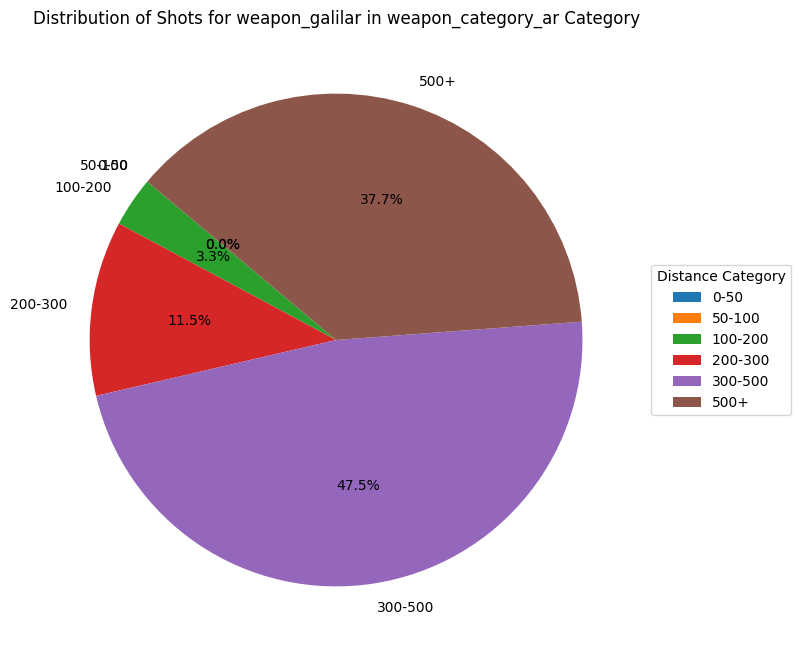

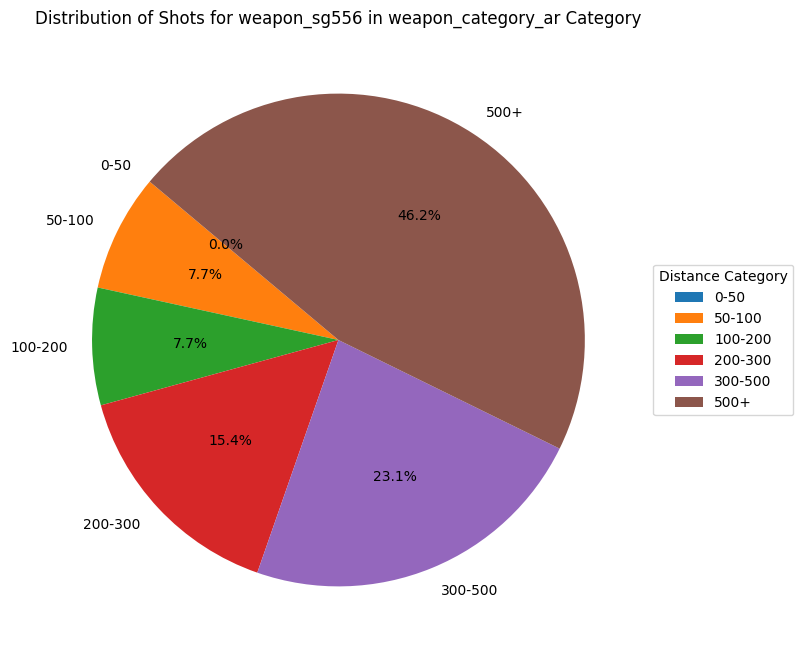

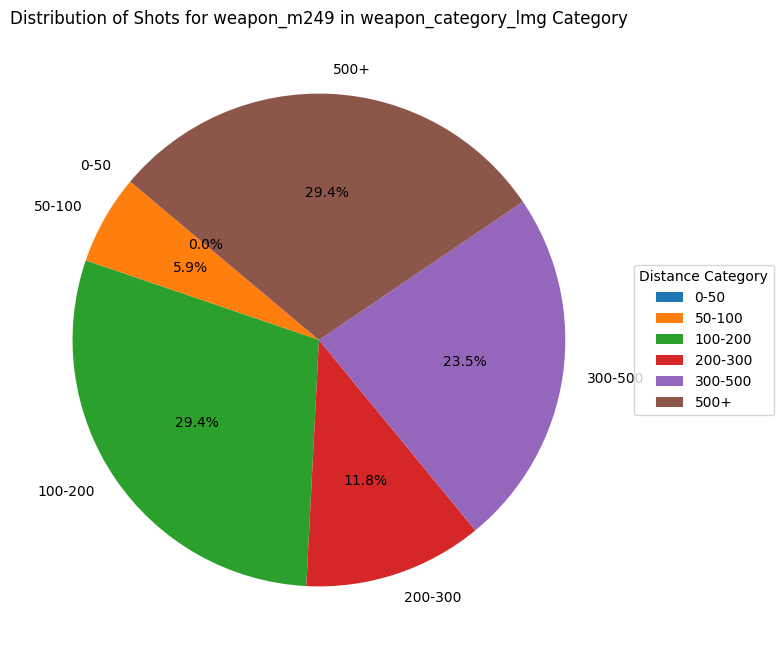

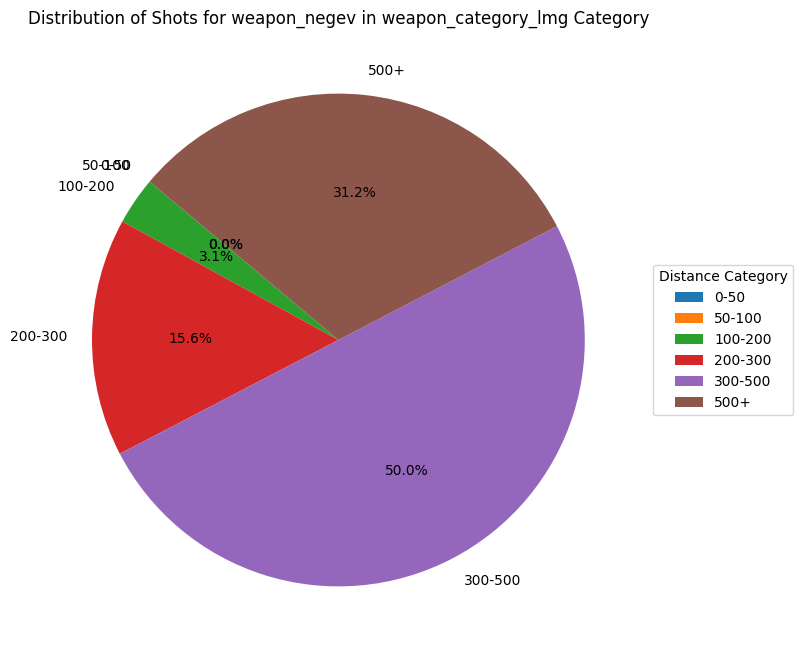

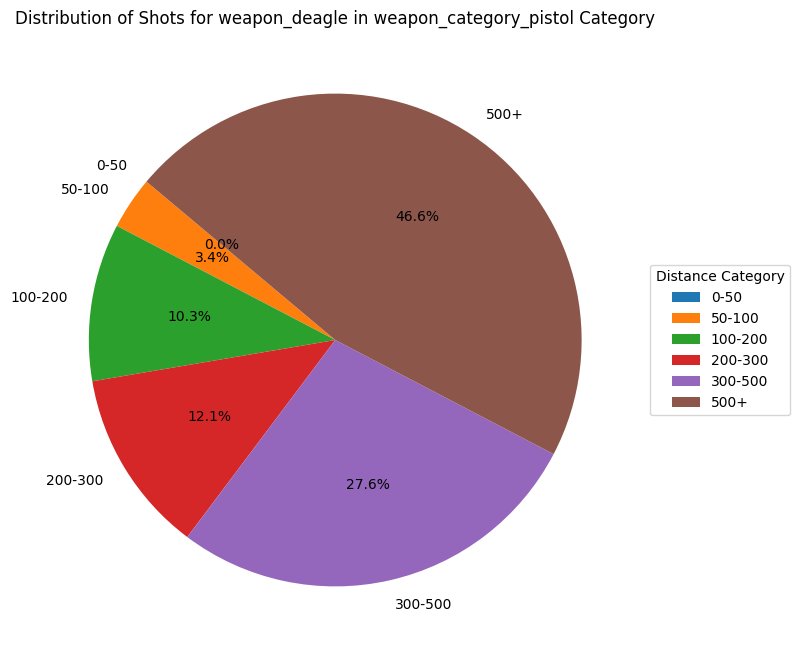

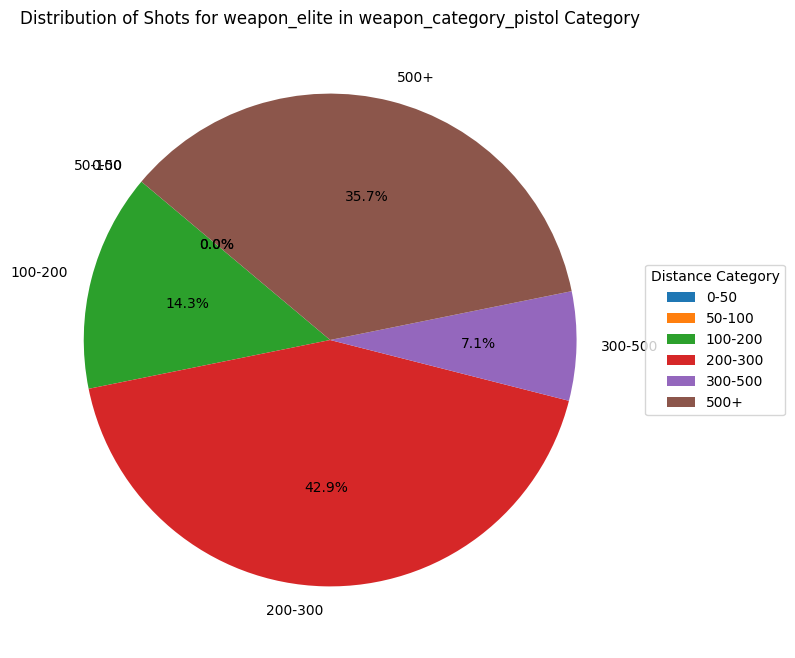

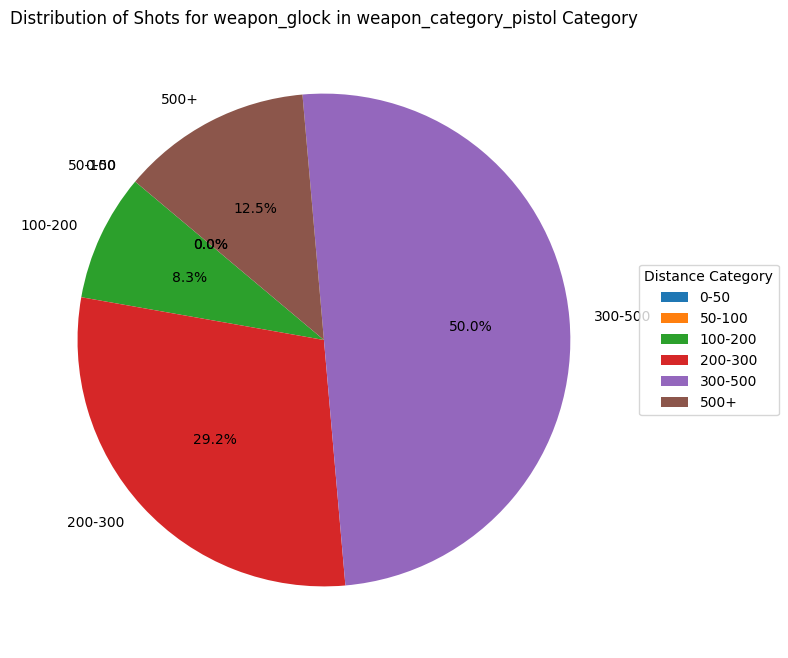

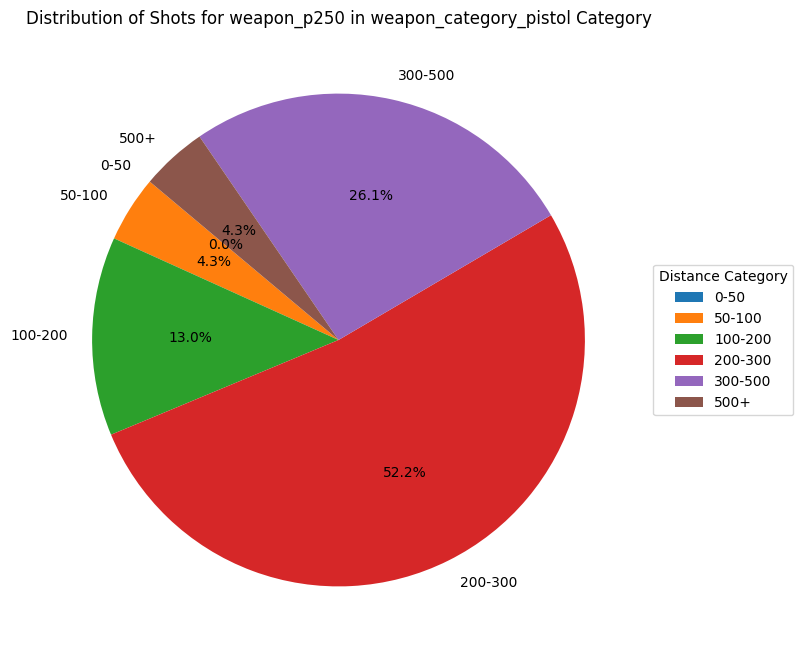

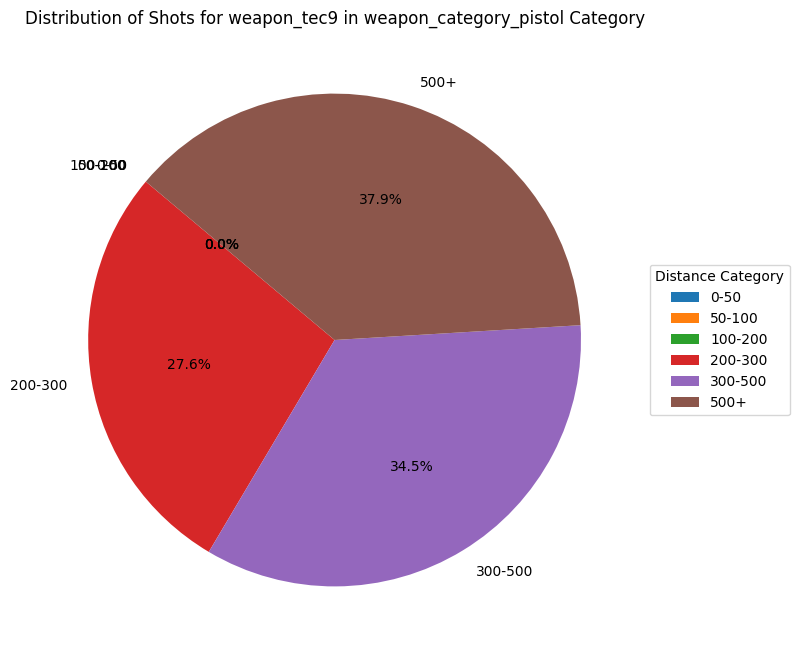

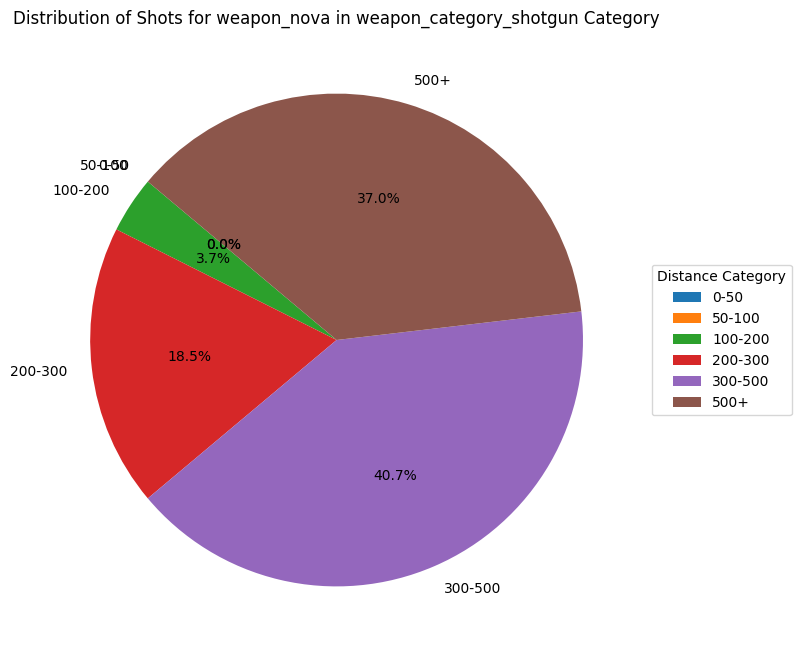

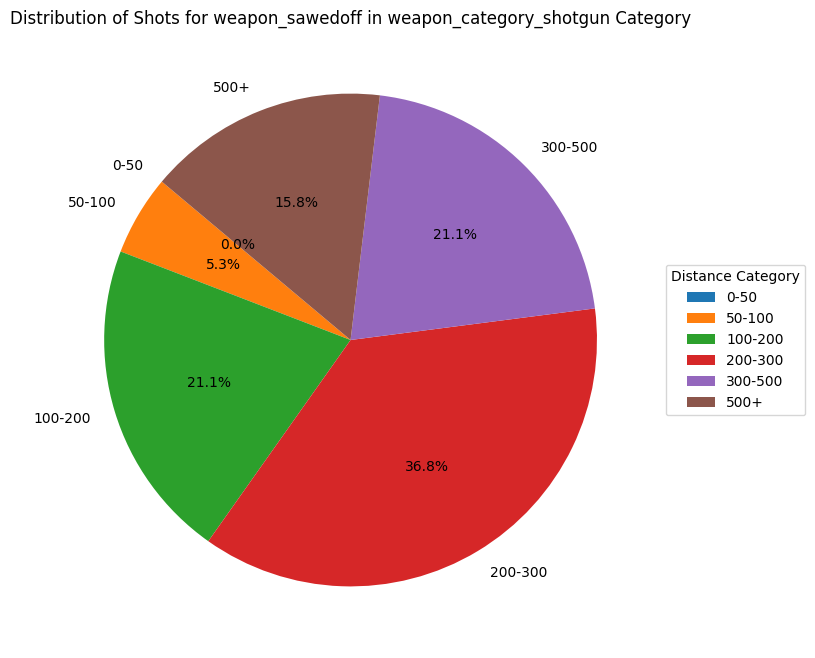

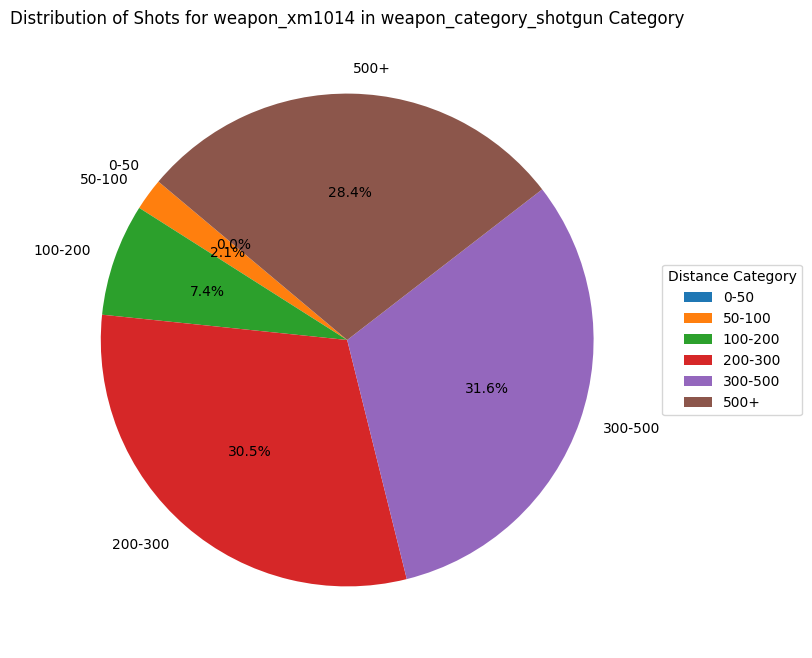

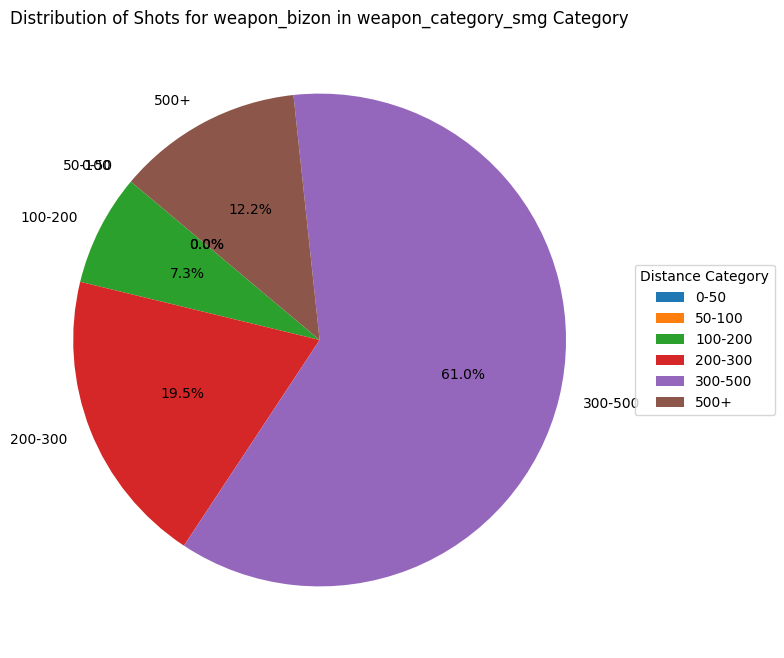

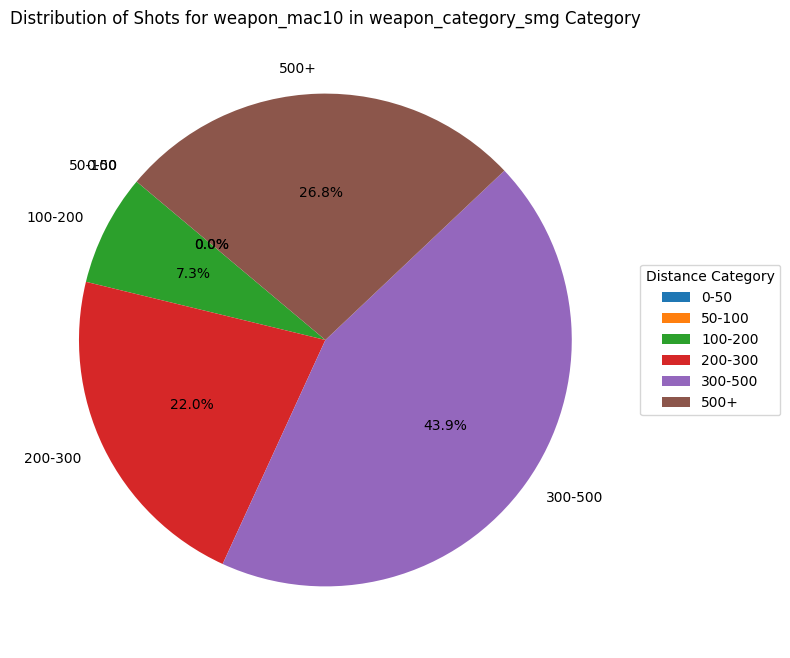

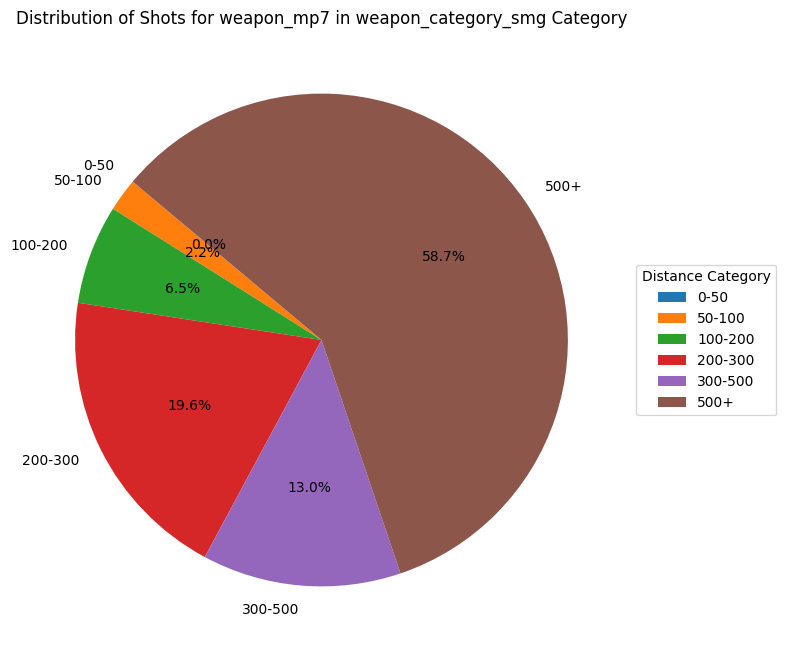

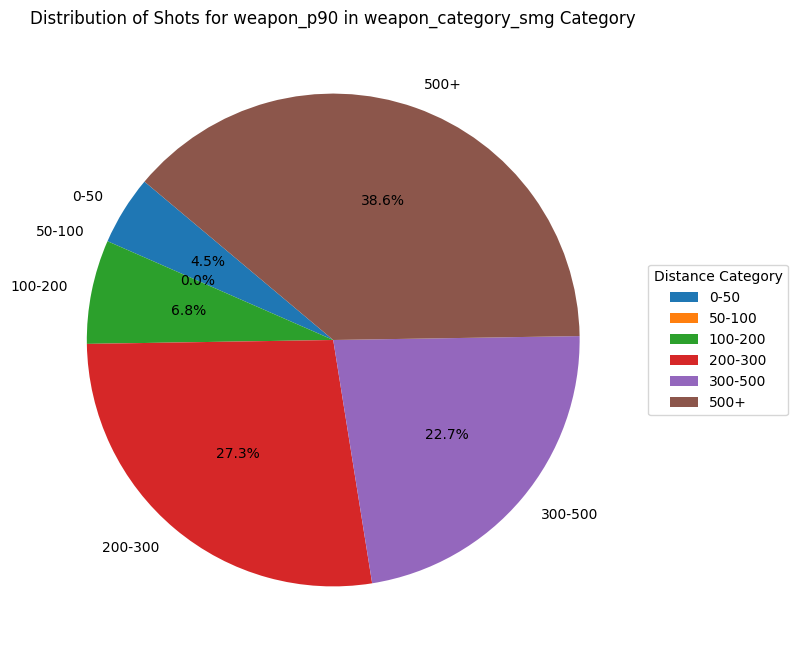

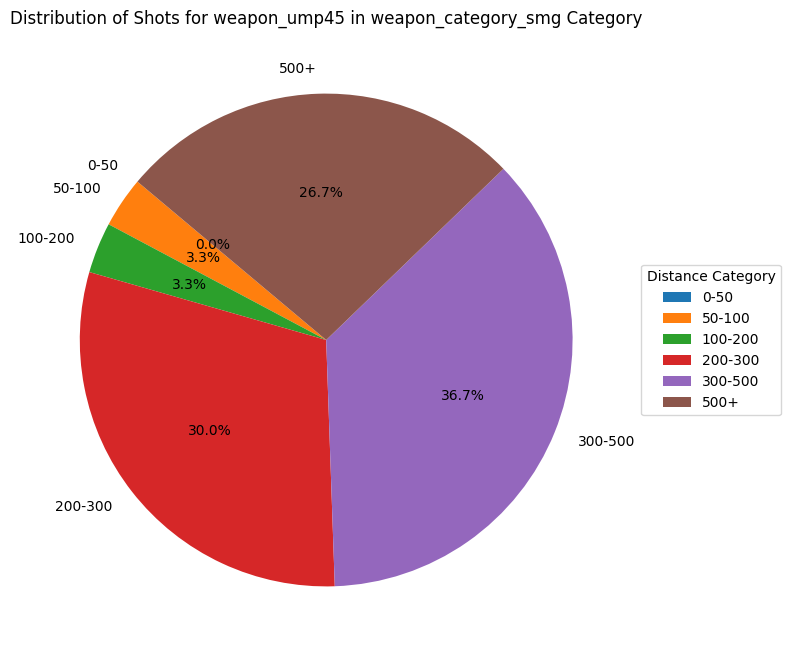

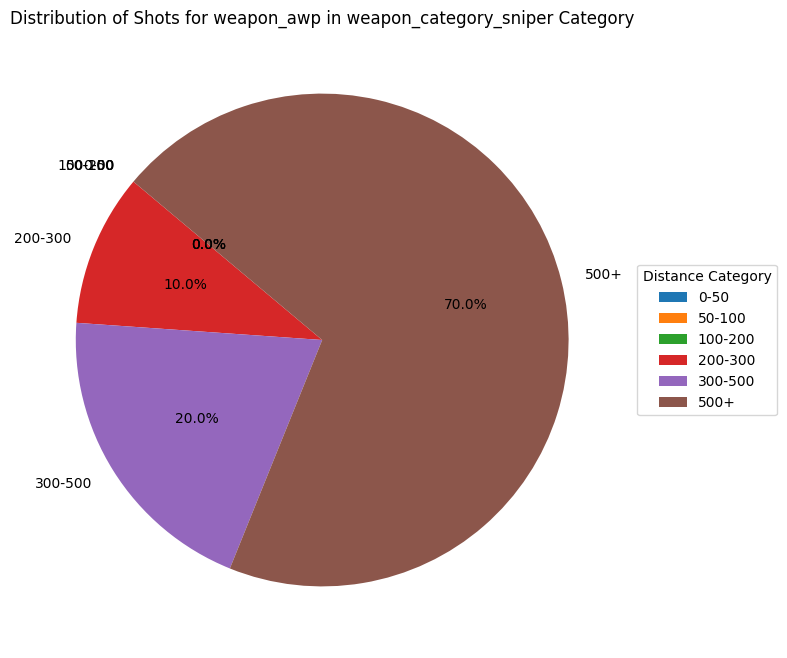

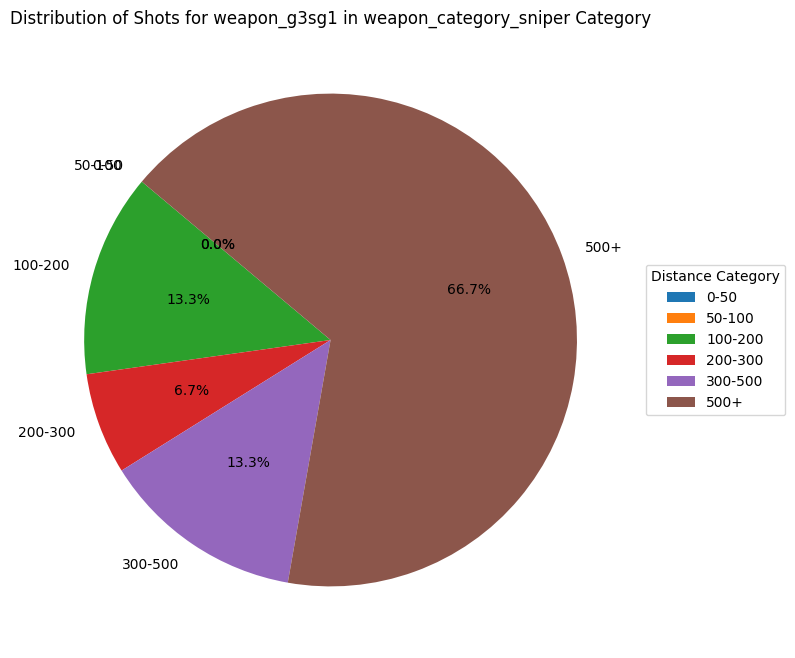

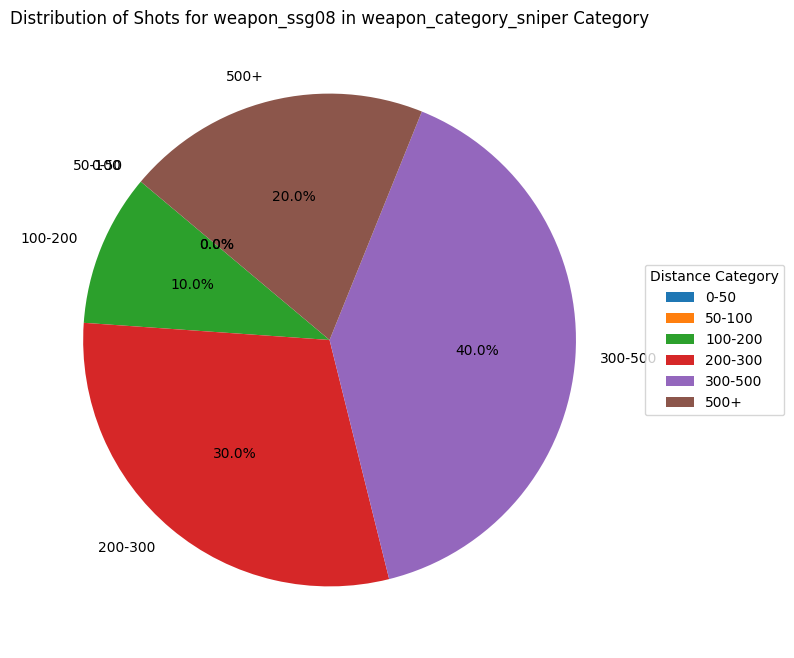

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

def question5():

    distance_columns = ['distToTarget', 'weaponCategory', 'weaponUsed']
    
    
    filtered_data = df[distance_columns].dropna()
    
    distance_bins = [0, 50, 100, 200, 300, 500, float('inf')]
    distance_labels = ['0-50', '50-100', '100-200', '200-300', '300-500', '500+']
    
    filtered_data['DistanceCategory'] = pd.cut(filtered_data['distToTarget'], bins=distance_bins, labels=distance_labels, right=False)
    
    grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')
    
    grouped_data = grouped_data.sort_values(['weaponCategory', 'weaponUsed', 'DistanceCategory'])
    
    unique_weapon_categories = grouped_data['weaponCategory'].unique()
    
    for category in unique_weapon_categories:
        category_data = grouped_data[grouped_data['weaponCategory'] == category]
        
        unique_weapons_in_category = category_data['weaponUsed'].unique()
        
        for weapon in unique_weapons_in_category:
            weapon_data = category_data[category_data['weaponUsed'] == weapon]
            
            if weapon_data['Count'].sum() != 0:
                plt.figure(figsize=(8, 8))
                plt.pie(weapon_data['Count'], labels=weapon_data['DistanceCategory'], autopct='%1.1f%%', startangle=140)
                plt.title(f'Distribution of Shots for {weapon} in {category} Category')
                
                
                plt.legend(weapon_data['DistanceCategory'], title='Distance Category', loc='center left', bbox_to_anchor=(1, 0.5))
                
                plt.show()

question5()


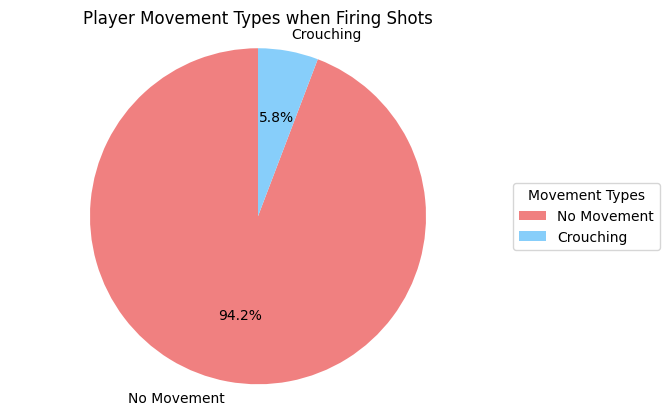

In [21]:
def question4():

    def analyze_movement_types(dataframe):
        
        filtered_data = dataframe
    
        
        crouching_count = filtered_data['isCrouching'].sum() if 'isCrouching' in filtered_data else 0
        jumping_count = filtered_data['isJumping'].sum() if 'isJumping' in filtered_data else 0
        no_movement_count = len(filtered_data) - (crouching_count + jumping_count)
    
        return crouching_count, jumping_count, no_movement_count
    
    
    
    crouching_count, jumping_count, no_movement_count = analyze_movement_types(df)
    
    
    labels = []
    sizes = []
    
    if crouching_count > 0:
        labels.append('Crouching')
        sizes.append(crouching_count)
    
    if jumping_count > 0:
        labels.append('Jumping')
        sizes.append(jumping_count)
    
    if no_movement_count > 0:
        labels.append('No Movement')
        sizes.append(no_movement_count)
    
    
    labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))
    
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
    ax.axis('equal')  
    
    ax.legend(labels, title='Movement Types', loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_aspect('equal')
    
    
    plt.title('Player Movement Types when Firing Shots')
    
    
    plt.show()

question4()

Number of times the target player was blind and shot landed on the target: 0
Number of times the target player was not blind and shot landed on the target: 70563


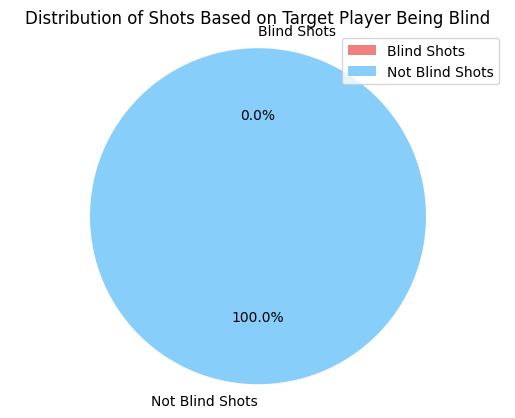

In [42]:
import matplotlib.pyplot as plt

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)


Total Shots: 71382
Obstructed Shots: 25


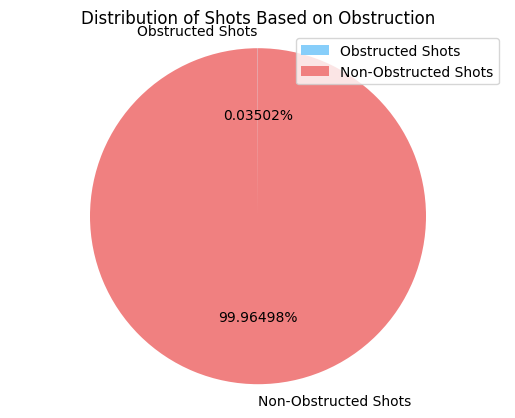

In [43]:
def question6():

    def count_obstructed_shots(dataframe):
        total_shots = len(dataframe)
    
        dataframe['isFlashed'] = dataframe['isFlashed'].fillna(False)
        dataframe['isTargetInSmoke'] = dataframe['isTargetInSmoke'].fillna(False)
    
        obstructed_shots = len(dataframe[(dataframe['isFlashed'].astype(bool) | dataframe['isTargetInSmoke'].astype(bool))])
    
        return total_shots, obstructed_shots
    
    total_shots, obstructed_shots = count_obstructed_shots(df)
    
    print(f"Total Shots: {total_shots}")
    print(f"Obstructed Shots: {obstructed_shots}")
    
  
    labels = ['Obstructed Shots', 'Non-Obstructed Shots']
    sizes = [obstructed_shots, total_shots - obstructed_shots]
    
    plt.pie(sizes, labels=labels, autopct='%1.5f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
    plt.axis('equal') 
    
    plt.title('Distribution of Shots Based on Obstruction')
        
    
    plt.legend(labels, loc='upper right')
    
    plt.show()
    
question6()

In [31]:
def question8():

    utility_columns = ['utilityDmgDone', 'supportUtilityUsed']
    
    
    filtered_data = df[utility_columns].dropna()
    
    
    average_utility_dmg_done = filtered_data['utilityDmgDone'].mean()
    average_support_utility_used = filtered_data['supportUtilityUsed'].mean()
    
    print(f'Average Utility Damage Done: {average_utility_dmg_done}')
    print(f'Average Support Utility Used: {average_support_utility_used}')

question8()

Average Utility Damage Done: 0.0
Average Support Utility Used: 0.0007922360863537334


Number of times the target player was blind and shot landed on the target: 0
Number of times the target player was not blind and shot landed on the target: 70563


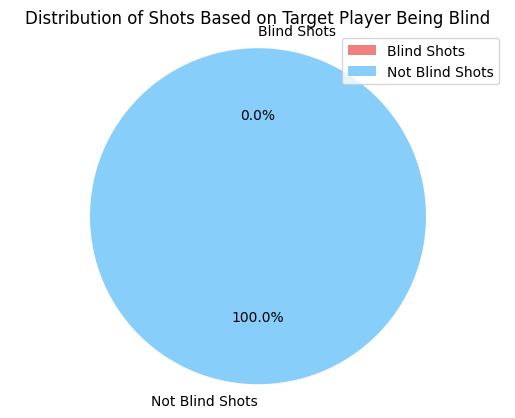

In [41]:
import matplotlib.pyplot as plt

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)
